In [1]:
import cv2
import os
import numpy as np
import time
import math
import apriltag
import pyrealsense2 as rs
from realworld_func.class_motionhelper import tracker, timer
from utils_real import *
from utils_track import tps_trans, get_tps_mat

In [2]:
Hz = 50

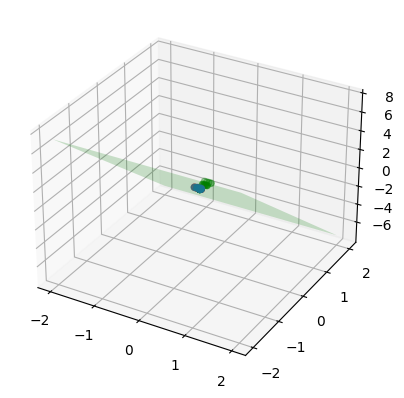

[[-5.5568893e-07 -6.0549263e-07]
 [ 3.2692731e-07 -6.2523441e-07]
 [-3.2264921e-07 -8.6806409e-07]
 [ 5.3080049e-07 -6.4544355e-07]
 [-1.0519044e-06  3.9731826e-06]
 [-4.6141899e-08  2.2449958e-06]
 [ 3.8019188e-08  2.6878802e-06]
 [ 1.0896194e-06  4.0721102e-06]
 [ 1.8469746e-06 -5.6360195e-06]
 [-1.5684398e-08 -3.0865860e-06]
 [ 2.0929912e-08 -3.2434125e-06]
 [-1.8495739e-06 -5.7576149e-06]
 [-1.9092508e-07  1.9858862e-06]
 [-4.0739377e-07  1.7259871e-06]
 [ 4.0291729e-07  1.7526019e-06]
 [ 1.8377330e-07  2.0252239e-06]
 [-8.1030458e-02 -2.2011262e-01]
 [ 2.6040908e-04 -2.6554553e-06]
 [ 3.9133697e-06 -6.5359060e-04]]


In [4]:
tps_coef = get_tps_mat()
print(tps_coef)

In [6]:
publish_xy(tps_coef, Hz, 120, LOG_INFO = True, VERBOSE = True)

TIMER WITH [50]HZ INITIALIZED. MAX_SEC IS [120.0sec].
[INFO] [1665403895.965605]: 0.06122779093894448 -0.006577173991167751 0.0629090060351253
[INFO] [1665403896.196424]: 0.06122779093894448 -0.006577173991167751 0.0629090060351253
[INFO] [1665403896.365046]: 0.06122779093894448 -0.006577173991167751 0.0629090060351253
[INFO] [1665403896.504766]: 0.06122779093894448 -0.006577173991167751 0.0629090060351253
[INFO] [1665403896.708415]: 0.06122779093894448 -0.006577173991167751 0.0629090060351253
[INFO] [1665403896.893815]: 0.06122779093894448 -0.006577173991167751 0.0629090060351253
[INFO] [1665403897.131992]: 0.06122779093894448 -0.006577173991167751 0.0629090060351253
[INFO] [1665403897.301525]: 0.06122779093894448 -0.006577173991167751 0.0629090060351253
[INFO] [1665403897.474435]: 0.06122779093894448 -0.006577173991167751 0.0629090060351253
[INFO] [1665403897.694343]: 0.06122779093894448 -0.006577173991167751 0.0629090060351253
[INFO] [1665403897.919545]: 0.06122779093894448 -0.00657

In [ ]:
#arduino_ide >> open imu_read.ino

#cd ~/Project/Snapbot
#python3 arduino_serial.py